In [ ]:
import sys
print(sys.version)

3.8.16 (default, Dec  7 2022, 01:12:13) 
[GCC 7.5.0]


In [ ]:
#from google.colab import drive
#drive.mount("/content/drive", force_remount=True)

In [ ]:
import tensorflow as tf
from tensorflow import keras
from keras import layers, models, regularizers
from keras.layers import Flatten, add, Dense, Dropout 
from keras.callbacks import ModelCheckpoint, EarlyStopping


print("TensorFlow version:", tf.__version__)
tf.keras.backend.set_floatx('float64')

TensorFlow version: 2.9.2


In [ ]:
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import seaborn as sns
from PIL import Image
import os
import csv
import random

import cv2
import imutils
import glob
# Make NumPy printouts easier to read.
np.set_printoptions(precision=3, suppress=True)

In [ ]:
#Określenie ścieżek do plików
test_zip = '/content/drive/MyDrive/Sieci/Baza_zdjec_przeplatane_2/Test.zip'
test_csv = 'test.csv'

train_zip = '/content/drive/MyDrive/Sieci/Baza_zdjec_przeplatane_2/Train.zip'
train_csv = 'train.csv'

folder = '/content/drive/MyDrive/Sieci/Baza_zdjec_przeplatane_2/'
slesh = '/'
png = '.png'

In [ ]:
#!unzip '/content/drive/MyDrive/Sieci/Baza_zdjec_przeplatane_2/Train.zip' -d '/content/train/'
#!unzip '/content/drive/MyDrive/Sieci/Baza_zdjec_przeplatane_2/Test.zip' -d '/content/test/'

In [ ]:
def release_list(a):
    
    del a[:]
    del a

In [ ]:
#Wczytanie etykiet do treninegu 

with open(folder+train_csv,"r") as csvfile:
    lines = csvfile.readlines()
csvfile.close()

new = []

for i in lines:
    new.append(i.split(" "))

    
value_train = []
for i in new[0]:
    value_train.append(int(i))    
    
print(len(value_train))

25200


In [ ]:
#Wczytanie etykiet do testowania

with open(folder+test_csv,"r") as csvfile:
    lines = csvfile.readlines()
csvfile.close()

new = []

for i in lines:
    new.append(i.split(" "))

    
value_test = []
for i in new[0]:
    value_test.append(int(i))    
    
print(len(value_test))

In [ ]:
#Wczytanie zdjęć treningowych (90% całego zbioru)
images_train = []
size = len(value_train)

for i in range(size):
    im = Image.open('/content/train/'+str(i)+'.png')
    arr_im = np.array(im) 
    arr_im = arr_im / 255.0
    images_train.append(arr_im) 
print(len(images_train))

25200


In [ ]:
#Wczytanie zdjęć testowych (10% całego zbioru)
images_test = []
size = len(value_test)

for i in range(size):
    im = Image.open('/content/test/'+str(i)+'.png')
    arr_im = np.array(im) 
    arr_im = arr_im / 255.0
    images_test.append(arr_im) 
print(len(images_test))

In [ ]:
x_train = np.array(images_train)
x_test = np.array(images_test)

y_train = np.array(value_train)
y_test = np.array(value_test)

[[0.    0.    0.    ... 0.251 0.051 0.   ]
 [0.    0.    0.    ... 0.439 0.4   0.   ]
 [0.302 0.204 0.333 ... 0.071 0.243 0.024]
 ...
 [0.    0.38  0.373 ... 0.294 0.29  0.286]
 [0.082 0.047 0.604 ... 0.    0.059 0.   ]
 [0.    0.392 0.38  ... 0.    0.    0.   ]]


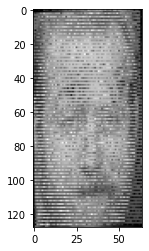

In [ ]:
a = 19000
plt.imshow(x_train[a],cmap = 'gray')
print(y_train[a])

In [ ]:
model = models.Sequential()
model.add(layers.Conv2D(32, (3, 3), activation='relu', input_shape=(128, 64, 1)))
model.add(layers.MaxPooling2D((2, 2)))
model.add(layers.Conv2D(32, (3, 3), activation='relu'))
model.add(layers.MaxPooling2D((2, 2)))

model.add(layers.BatchNormalization())

model.add(layers.Conv2D(64, (3, 3), activation='relu'))
model.add(layers.MaxPooling2D((2, 2)))
model.add(layers.Conv2D(64, (3, 3), activation='relu'))
model.add(layers.MaxPooling2D((2, 2)))


model.add(layers.BatchNormalization())

model.add(layers.Flatten())
model.add(layers.Dense(64, activation='relu'))
model.add(layers.Dense(1, activation='relu'))


In [ ]:
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 126, 62, 32)       320       
                                                                 
 max_pooling2d (MaxPooling2D  (None, 63, 31, 32)       0         
 )                                                               
                                                                 
 dropout (Dropout)           (None, 63, 31, 32)        0         
                                                                 
 conv2d_1 (Conv2D)           (None, 61, 29, 64)        18496     
                                                                 
 max_pooling2d_1 (MaxPooling  (None, 30, 14, 64)       0         
 2D)                                                             
                                                                 
 dropout_1 (Dropout)         (None, 30, 14, 64)        0

In [ ]:
model.compile(optimizer='adam',
              loss='mse',
              metrics=['accuracy','mse'])

#Funcka umożliwia zatrzymanie się uczenia 
#gdy wartość strat przstanie maleć
EarlyStop = EarlyStopping(monitor='val_loss',  
                          verbose=1, 
                          patience=10)


ModelCheck = ModelCheckpoint(filepath='/content/drive/MyDrive/Sieci/Przeplatane_forefox.h5',
                             monitor='val_loss',
                             save_best_only=True)

history = model.fit(x=x_train, 
                    y=y_train, 
                    epochs=100,
                    batch_size=128,
                    validation_split=0.1,
                    callbacks = [EarlyStop, ModelCheck]
                   )

Epoch 1/100
80/80 [==============================] - 48s 507ms/step - loss: 2.2471 - accuracy: 0.6869 - mse: 0.2075 - val_loss: 0.1882 - val_accuracy: 0.8496 - val_mse: 0.1074
Epoch 2/100
80/80 [==============================] - 39s 489ms/step - loss: 0.1254 - accuracy: 0.8720 - mse: 0.0933 - val_loss: 0.1266 - val_accuracy: 0.8536 - val_mse: 0.1127
Epoch 3/100
80/80 [==============================] - 39s 493ms/step - loss: 0.0954 - accuracy: 0.8912 - mse: 0.0827 - val_loss: 0.1244 - val_accuracy: 0.8589 - val_mse: 0.1123
Epoch 4/100
80/80 [==============================] - 39s 483ms/step - loss: 0.0848 - accuracy: 0.9066 - mse: 0.0724 - val_loss: 0.1491 - val_accuracy: 0.8175 - val_mse: 0.1366
Epoch 5/100
80/80 [==============================] - 39s 493ms/step - loss: 0.0757 - accuracy: 0.9229 - mse: 0.0628 - val_loss: 0.1071 - val_accuracy: 0.8818 - val_mse: 0.0954
Epoch 6/100
80/80 [==============================] - 39s 486ms/step - loss: 0.0733 - accuracy: 0.9283 - mse: 0.0594 - va

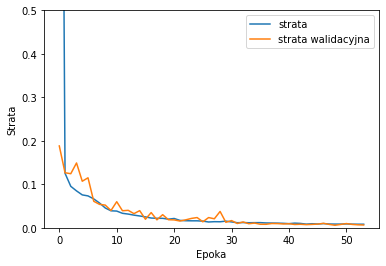

In [ ]:
plt.plot(history.history['loss'], label='strata')
plt.plot(history.history['val_loss'], label = 'strata walidacyjna')
plt.xlabel('Epoka')
plt.ylabel('Strata')
plt.ylim([0.0, 0.5])
plt.legend(loc='upper right')

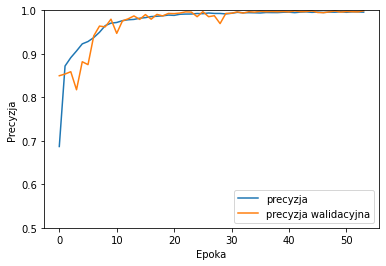

In [ ]:
plt.plot(history.history['accuracy'], label='precyzja')
plt.plot(history.history['val_accuracy'], label = 'precyzja walidacyjna')
plt.xlabel('Epoka')
plt.ylabel('Precyzja')
plt.ylim([0.5, 1])
plt.legend(loc='lower right')

In [ ]:
model.evaluate(x_test,  y_test, verbose=2)

79/79 - 2s - loss: 0.0064 - accuracy: 0.9980 - mse: 0.0029 - 2s/epoch - 24ms/step


[0.006404248911883936, 0.998015873015873, 0.0028857954082525342]

In [ ]:
best_model = tf.keras.models.load_model('/content/drive/MyDrive/Sieci/Przeplatane_forefox.h5')

In [ ]:
best_model.evaluate(x_test,  y_test, verbose=2)

79/79 - 2s - loss: 0.0057 - accuracy: 0.9988 - mse: 0.0024 - 2s/epoch - 22ms/step


[0.005736317373222073, 0.9988095238095238, 0.002426077955663856]

In [ ]:
predict_x = best_model.predict(x_test) 

predictions = (predict_x > 0.5).astype("int32")

79/79 [==============================] - 2s 18ms/step


In [ ]:
names = [['Tn','Nn'],['Np', 'Tp']]
names = np.reshape(names,(2,2))
print(names)

conf = tf.math.confusion_matrix(y_test,predictions)

print(conf)

[['Tn' 'Nn']
 ['Np' 'Tp']]
tf.Tensor(
[[1302    3]
 [   0 1215]], shape=(2, 2), dtype=int32)
